In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
current_loan_amount = 300000
current_loan_percent = 3.5
current_loan_term = 15
current_loan_start = '06/01/2017'
payments_per_year = 12

new_loan_percent = 2.8
new_loan_term = 15
new_loan_start = '03/01/2021' 
new_loan_fees = 5000

assumed_rate_of_return = 1.07

In [3]:
rng = pd.date_range(start = pd.to_datetime(current_loan_start, format = '%m/%d/%Y'), periods=current_loan_term*payments_per_year, freq='MS')
df = pd.DataFrame({ 'Date': rng, 
                    'Beginning_Balance':0,
                    'Scheduled_Payment':0,
                    'Principal':0,
                    'Interest':0,
                    'Ending_Balance':0,
                    'Cumulative_Interest':0                    
                  }) 

In [4]:
df["Scheduled_Payment"] = -np.pmt(current_loan_percent/100/payments_per_year, current_loan_term*payments_per_year, current_loan_amount)
df["Interest"] = -np.ipmt(current_loan_percent/100/payments_per_year, df.index+1, current_loan_term*payments_per_year, current_loan_amount)
df["Principal"] = df["Scheduled_Payment"]-df["Interest"]
df['Cumulative_Interest'] = df['Interest'].cumsum()
df['Ending_Balance'] = current_loan_amount-df['Principal'].cumsum()
df['Beginning_Balance'] = df['Principal'] + df['Ending_Balance']

<ipython-input-4-71335d01a0e8>:1: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  df["Scheduled_Payment"] = -np.pmt(current_loan_percent/100/payments_per_year, current_loan_term*payments_per_year, current_loan_amount)
<ipython-input-4-71335d01a0e8>:2: DeprecationWarning: numpy.ipmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ipmt instead (https://pypi.org/project/numpy-financial/).
  df["Interest"] = -np.ipmt(current_loan_percent/100/payments_per_year, df.index+1, current_loan_term*payments_per_year, current_loan_amount)


In [5]:
pd.options.display.float_format = '${:,.2f}'.format

In [6]:
new_loan_amount = df[df['Date'] == pd.to_datetime(new_loan_start, format = '%m/%d/%Y')]['Beginning_Balance'].iloc[0]

nrng = pd.date_range(start = pd.to_datetime(new_loan_start, format = '%m/%d/%Y'), periods=new_loan_term*payments_per_year, freq='MS')
ndf = pd.DataFrame({ 'Date': nrng, 
                    'Beginning_Balance':0,
                    'Scheduled_Payment':0,
                    'Principal':0,
                    'Interest':0,
                    'Ending_Balance':0,
                    'Cumulative_Interest':0                    
                  })

In [7]:
ndf["Scheduled_Payment"] = -np.pmt(new_loan_percent/100/payments_per_year, new_loan_term*payments_per_year, new_loan_amount)
ndf["Interest"] = -np.ipmt(new_loan_percent/100/payments_per_year, ndf.index+1, new_loan_term*payments_per_year, new_loan_amount)
ndf["Principal"] = ndf["Scheduled_Payment"]-ndf["Interest"]
ndf['Cumulative_Interest'] = ndf['Interest'].cumsum()
ndf['Ending_Balance'] = new_loan_amount-ndf['Principal'].cumsum()
ndf['Beginning_Balance'] = ndf['Principal'] + ndf['Ending_Balance']

<ipython-input-7-f254442b45da>:1: DeprecationWarning: numpy.pmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pmt instead (https://pypi.org/project/numpy-financial/).
  ndf["Scheduled_Payment"] = -np.pmt(new_loan_percent/100/payments_per_year, new_loan_term*payments_per_year, new_loan_amount)
<ipython-input-7-f254442b45da>:2: DeprecationWarning: numpy.ipmt is deprecated and will be removed from NumPy 1.20. Use numpy_financial.ipmt instead (https://pypi.org/project/numpy-financial/).
  ndf["Interest"] = -np.ipmt(new_loan_percent/100/payments_per_year, ndf.index+1, new_loan_term*payments_per_year, new_loan_amount)


In [8]:
pd.set_option('display.max_rows', None)
finaldf = df.merge(ndf, how = 'outer', on='Date', suffixes = ('_cur', '_new') )
finaldf = finaldf[finaldf['Date'] >= pd.to_datetime(new_loan_start, format = '%m/%d/%Y')]
finaldf = finaldf.reset_index(drop = True)
finaldf = finaldf.fillna(0)
finaldf['Differnce_Paid'] = finaldf['Scheduled_Payment_new'] - finaldf['Scheduled_Payment_cur']
finaldf['Differnce_Paid_cum'] = finaldf['Differnce_Paid'].cumsum()
finaldf['Owed_Balance_Diff'] = finaldf['Ending_Balance_new'] - finaldf['Ending_Balance_cur']
finaldf['Refinance_fee'] = 0
finaldf.loc[0, 'Refinance_fee'] = new_loan_fees
finaldf['money_in_hand'] = -finaldf['Refinance_fee'].cumsum() - finaldf['Differnce_Paid_cum']
finaldf['HouseVal_and_netpaiddiff_cum'] = -finaldf['Owed_Balance_Diff'] + finaldf['money_in_hand']
finaldf['Interest_Potential'] = finaldf['money_in_hand']*assumed_rate_of_return**(1/12)-finaldf['money_in_hand']
finaldf['Interest_Potential_cum'] = finaldf['Interest_Potential'].cumsum()

In [9]:
finaldf

,Date,Beginning_Balance_cur,Scheduled_Payment_cur,Principal_cur,Interest_cur,Ending_Balance_cur,Cumulative_Interest_cur,Beginning_Balance_new,Scheduled_Payment_new,Principal_new,...,Ending_Balance_new,Cumulative_Interest_new,Differnce_Paid,Differnce_Paid_cum,Owed_Balance_Diff,Refinance_fee,money_in_hand,HouseVal_and_netpaiddiff_cum,Interest_Potential,Interest_Potential_cum
0,2021-03-01,"$239,041.68","$2,144.65","$1,447.44",$697.20,"$237,594.23","$36,248.03","$239,041.68","$1,627.88","$1,070.12",...,"$237,971.56",$557.76,$-516.77,$-516.77,$377.32,5000,"$-4,483.23","$-4,860.56",$-25.35,$-25.35
1,2021-04-01,"$237,594.23","$2,144.65","$1,451.66",$692.98,"$236,142.57","$36,941.01","$237,971.56","$1,627.88","$1,072.62",...,"$236,898.94","$1,113.03",$-516.77,"$-1,033.53",$756.37,0,"$-3,966.47","$-4,722.84",$-22.43,$-47.78
2,2021-05-01,"$236,142.57","$2,144.65","$1,455.90",$688.75,"$234,686.67","$37,629.76","$236,898.94","$1,627.88","$1,075.12",...,"$235,823.83","$1,665.80",$-516.77,"$-1,550.30","$1,137.15",0,"$-3,449.70","$-4,586.86",$-19.51,$-67.28
3,2021-06-01,"$234,686.67","$2,144.65","$1,460.14",$684.50,"$233,226.53","$38,314.26","$235,823.83","$1,627.88","$1,077.63",...,"$234,746.20","$2,216.05",$-516.77,"$-2,067.06","$1,519.67",0,"$-2,932.94","$-4,452.61",$-16.58,$-83.86
4,2021-07-01,"$233,226.53","$2,144.65","$1,464.40",$680.24,"$231,762.12","$38,994.50","$234,746.20","$1,627.88","$1,080.14",...,"$233,666.06","$2,763.79",$-516.77,"$-2,583.83","$1,903.94",0,"$-2,416.17","$-4,320.11",$-13.66,$-97.53
5,2021-08-01,"$231,762.12","$2,144.65","$1,468.67",$675.97,"$230,293.45","$39,670.48","$233,666.06","$1,627.88","$1,082.66",...,"$232,583.40","$3,309.01",$-516.77,"$-3,100.59","$2,289.95",0,"$-1,899.41","$-4,189.36",$-10.74,$-108.27
6,2021-09-01,"$230,293.45","$2,144.65","$1,472.96",$671.69,"$228,820.49","$40,342.17","$232,583.40","$1,627.88","$1,085.19",...,"$231,498.21","$3,851.71",$-516.77,"$-3,617.36","$2,677.72",0,"$-1,382.64","$-4,060.36",$-7.82,$-116.08
7,2021-10-01,"$228,820.49","$2,144.65","$1,477.25",$667.39,"$227,343.24","$41,009.56","$231,498.21","$1,627.88","$1,087.72",...,"$230,410.49","$4,391.87",$-516.77,"$-4,134.12","$3,067.25",0,$-865.88,"$-3,933.13",$-4.90,$-120.98
8,2021-11-01,"$227,343.24","$2,144.65","$1,481.56",$663.08,"$225,861.67","$41,672.64","$230,410.49","$1,627.88","$1,090.26",...,"$229,320.23","$4,929.49",$-516.77,"$-4,650.89","$3,458.56",0,$-349.11,"$-3,807.67",$-1.97,$-122.95
9,2021-12-01,"$225,861.67","$2,144.65","$1,485.88",$658.76,"$224,375.79","$42,331.41","$229,320.23","$1,627.88","$1,092.80",...,"$228,227.43","$5,464.57",$-516.77,"$-5,167.66","$3,851.64",0,$167.66,"$-3,683.99",$0.95,$-122.00


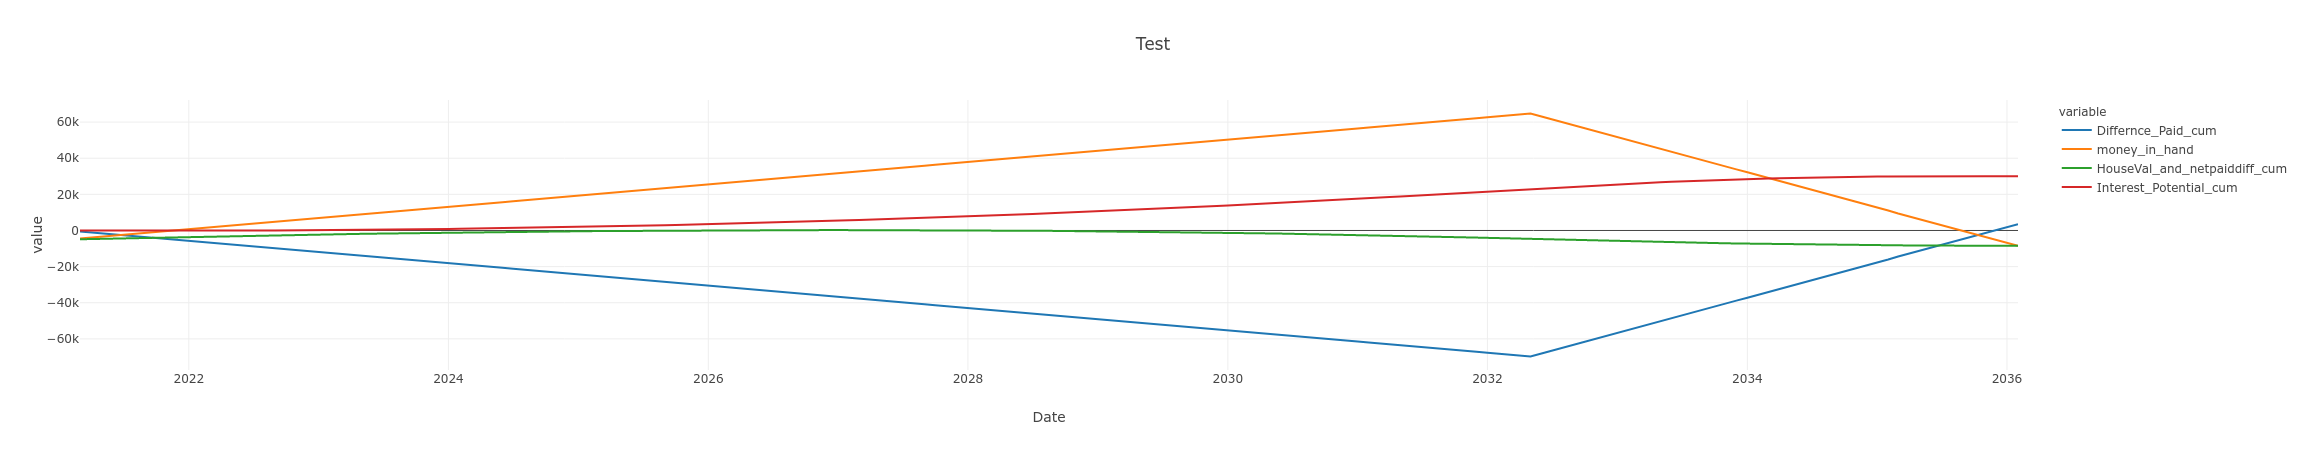

In [18]:
fig = px.line(
            finaldf, 
            x="Date", 
            y=['Differnce_Paid_cum', 'money_in_hand', 'HouseVal_and_netpaiddiff_cum', 'Interest_Potential_cum'],
            title= 'Test',
            template='none'
            )
fig.show()

In [11]:
finaldf.columns

Index(['Date', 'Beginning_Balance_cur', 'Scheduled_Payment_cur',
       'Principal_cur', 'Interest_cur', 'Ending_Balance_cur',
       'Cumulative_Interest_cur', 'Beginning_Balance_new',
       'Scheduled_Payment_new', 'Principal_new', 'Interest_new',
       'Ending_Balance_new', 'Cumulative_Interest_new', 'Differnce_Paid',
       'Differnce_Paid_cum', 'Owed_Balance_Diff', 'Refinance_fee',
       'money_in_hand', 'HouseVal_and_netpaiddiff_cum', 'Interest_Potential',
       'Interest_Potential_cum'],
      dtype='object')